In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from read_path_module import read_data_relative_path
from write_path_module import write_data_relative_path

### - Import the dataset

In [51]:
df = read_data_relative_path('./data/CDC_Natality/2003_2018.csv', data_type='csv')

### - Create pandas datetime column

In [52]:
df['DT'] = pd.to_datetime(df['Year'].astype(str)  + df['Month Code'].astype(str), format='%Y%m')
df.sample(2)

,Notes,Year,Year Code,Month,Month Code,State,State Code,County,County Code,Births,Average Age of Mother,Average LMP Gestational Age,DT
85945,NaN,2014,2014,October,10,Connecticut,9,"New London County, CT",9011,224.0,29.52,39.11,2014-10-01
73469,NaN,2013,2013,February,2,Illinois,17,"McHenry County, IL",17111,214.0,29.62,38.95,2013-02-01


### - Clean, reorder, and create new columns

In [67]:
df['State Acronym'] = df['County'][0][-2:]
df[['CTY','temp']] = df['County'].str.split(',', expand=True)
df.drop(columns=['temp'], inplace=True)

df.sample(3)

df.columns.to_list()

col_lst = ['Year',
           'Month',
           'Month Code',
           'DT',
           'State',
           'State Acronym',
           'State Code',
           'County',
           'CTY',
           'County Code',
           'Births',
           'Average Age of Mother',
           'Average LMP Gestational Age',
           'Notes']

df = df[col_lst]
del col_lst
df.sample(3)

,Year,Month,Month Code,DT,State,State Acronym,State Code,County,CTY,County Code,Births,Average Age of Mother,Average LMP Gestational Age,Notes
40203,2008,September,9,2008-09-01,Indiana,AL,18,"Johnson County, IN",Johnson County,18081,168.0,27.11,38.94,NaN
90176,2015,April,4,2015-04-01,Texas,AL,48,"Hidalgo County, TX",Hidalgo County,48215,1215.0,26.55,38.19,NaN
96882,2016,March,3,2016-03-01,New Jersey,AL,34,"Somerset County, NJ",Somerset County,34035,267.0,31.39,38.76,NaN


### - Create time-series visualization of births per county

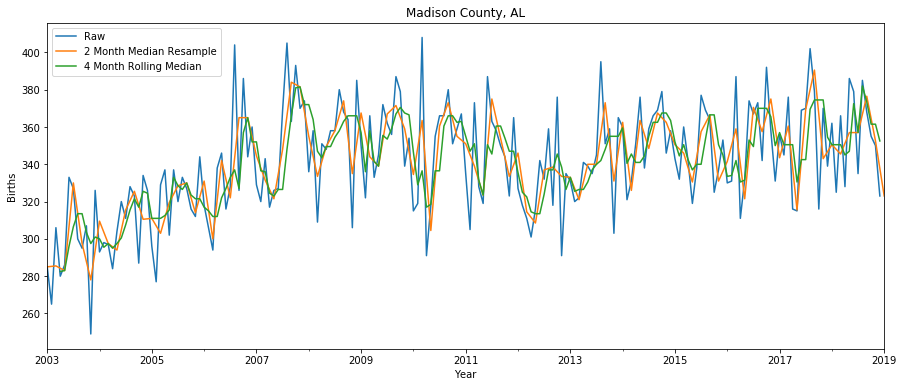

In [102]:
lst_county_codes = list(df['County Code'].unique())

df_county = df[df['County Code']==lst_county_codes[5]]
df_county.index = df_county['DT']
df_county.head(2)

df_county['Births'].plot(figsize=(15,6), legend=True, label='Raw')
df_county['Births'].resample("2m").median().plot(figsize=(15,6), legend=True, label='2 Month Median Resample')
df_county['Births'].rolling(4).median().plot(figsize=(15,6), legend=True, label='4 Month Rolling Median')

plt.xlabel('Year')
plt.ylabel('Births')
plt.title(df['County'][5])
plt.show()

In [119]:
lst_county_codes = list(df['County Code'].unique())

def Random_County_Plotter(df_county, lst_county_codes):
    
    import random 
    n = random.randrange(0, len(lst_county_codes))
    
    df_county = df[df['County Code']==lst_county_codes[n]]
    df_county.index = df_county['DT']
    df_county.head(2)

    df_county['Births'].plot(figsize=(15,6), legend=True, label='Raw')
    df_county['Births'].resample("2m").median().plot(figsize=(15,6), legend=True, label='2 Month Median Resample')
    df_county['Births'].rolling(4).median().plot(figsize=(15,6), legend=True, label='4 Month Rolling Median')

    plt.xlabel('Year')
    plt.ylabel('Births')
    plt.title(df['County'][n])
    plt.show()


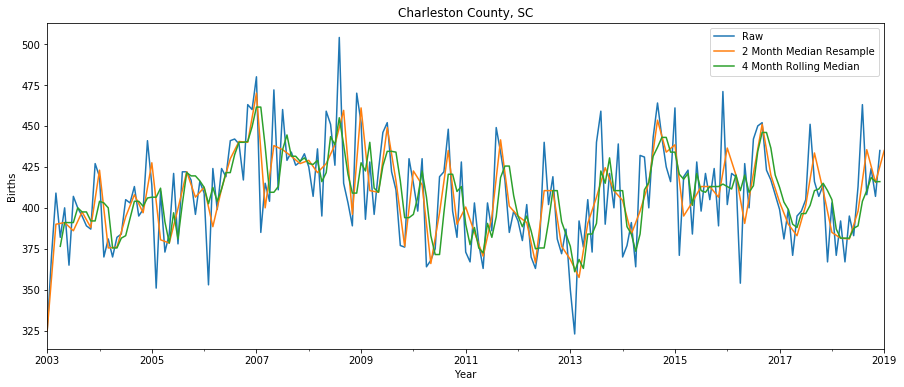

In [122]:
Random_County_Plotter(df_county, lst_county_codes)

In [104]:
x = len(lst_county_codes)
import random 
random.randrange(0, x)

185

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

In [4]:
df[df['County Code']==1003]

,Notes,Year,Year Code,Month,Month Code,State,State Code,County,County Code,Births,Average Age of Mother,Average LMP Gestational Age
0,NaN,2003.0,2003.0,January,1.0,Alabama,1.0,"Baldwin County, AL",1003.0,131.0,26.77,37.97
572,NaN,2003.0,2003.0,February,2.0,Alabama,1.0,"Baldwin County, AL",1003.0,134.0,26.32,38.65
1144,NaN,2003.0,2003.0,March,3.0,Alabama,1.0,"Baldwin County, AL",1003.0,142.0,26.74,38.41
1716,NaN,2003.0,2003.0,April,4.0,Alabama,1.0,"Baldwin County, AL",1003.0,157.0,27.72,37.9
2288,NaN,2003.0,2003.0,May,5.0,Alabama,1.0,"Baldwin County, AL",1003.0,146.0,27.16,37.91
...,...,...,...,...,...,...,...,...,...,...,...,...
114748,NaN,2018.0,2018.0,August,8.0,Alabama,1.0,"Baldwin County, AL",1003.0,202,28.20,38.52
115376,NaN,2018.0,2018.0,September,9.0,Alabama,1.0,"Baldwin County, AL",1003.0,209,28.86,38.59
116004,NaN,2018.0,2018.0,October,10.0,Alabama,1.0,"Baldwin County, AL",1003.0,206,27.37,38.13
116632,NaN,2018.0,2018.0,November,11.0,Alabama,1.0,"Baldwin County, AL",1003.0,182,27.86,38.15
